<h1>Data Exploration</h1>
<p>In this notebook we will perform a broad data exploration on the <code>Auto</code> data set. Note that the aim of this exploration is not to be completely thorough; instead we would like to gain quick insights to help develop a first prototype. Upon analyzing the output of the prototype, we can analyze the data further to gain more insight.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/DataQualityReports.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p>We first read the comma-separated values (csv) <code>Auto</code> file into a pandas DataFrame. To get a feeling for the data we display the top five rows of the DataFrame using the <code>head()</code> method and we show how many rows and columns the DataFrame has by using the <code>shape</code> attribute. We also show the <code>dtypes</code> attribute, which returns a pandas Series with the data type of each column.</p>

In [2]:
df = pd.read_csv("Auto.csv")
df.head()
df.shape
df.dtypes

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(397, 9)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

<p>We see that most of the columns have the expected data type, except for the column associated with $\mathrm{horsepower}$. (Note that the dtype <code>object</code>  can contain the <code>str</code> Python type or multiple different Python types.) To further investigate why it has the dtype <code>object</code>, we use the <code>unique()</code> method to show the unique values in the $\mathrm{horsepower}$ column (and we also sort the returned <code>np.ndarray</code> using the <code>np.sort()</code> method for convenience).</p>

In [3]:
np.sort(df['horsepower'].unique())

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

<p>A careful examination shows that at least one the elements in the $\mathrm{horsepower}$ column stores a <code>'?'</code> string. These question marks indicate missing values, and to see how many total missing values there are we use <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing">boolean indexing</a> and the <code>shape</code> attribute.
</p>

In [4]:
df[df['horsepower'] == '?']
df[df['horsepower'] == '?'].shape
df.shape

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


(5, 9)

(397, 9)

<p>This shows that there are $5$ missing values in total that seem pretty randomly distributed accross the $397$ total rows. We can deal with these missing values by converting the type of the $\mathrm{horsepower}$ column from <code>object</code> to a <code>numeric</code> type by using the <code>to_numeric()</code> method. Setting the <code>errors</code> argument to <code>'coerce'</code> ensures that when pandas encounters invalid parsing, the associated value will be set as <code>NaN</code>. In other words, by <i>coercing</i> the conversion of the $\mathrm{horsepower}$ column to a <code>numeric</code> type, the <code>'?'</code> values get converted to <code>NaN</code> values. Finally, we alse use the <code>set_index()</code> method to set the DataFrame index using the $\mathrm{name}$ column.</p>

In [5]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].dtype
np.sort(df['horsepower'].unique())
df = df.set_index('name')
df.head()

dtype('float64')

array([ 46.,  48.,  49.,  52.,  53.,  54.,  58.,  60.,  61.,  62.,  63.,
        64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98., 100., 102., 103., 105., 107., 108., 110., 112., 113., 115.,
       116., 120., 122., 125., 129., 130., 132., 133., 135., 137., 138.,
       139., 140., 142., 145., 148., 149., 150., 152., 153., 155., 158.,
       160., 165., 167., 170., 175., 180., 190., 193., 198., 200., 208.,
       210., 215., 220., 225., 230.,  nan])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


<p>We can perform another check to see if any values are missing in the DataFrame using its <code>isnull</code> method.</p>

In [6]:
df[df.isnull().any(axis=1)]
df[df.isnull().any(axis=1)].shape

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,2
ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1
renault 18i,34.5,4,100.0,NaN,2320,15.8,81,2


(5, 8)

<p>This shows that we have no other obvious missing values. Now that we have gained a bit more insight of our data, we would like to organize our DataFrame into two groups defined by whether the variable is <i>quantitative</i> or <i>categorical</i>. We can achieve this by <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#hierarchical-indexing-multiindex">hierarchical indexing</a>, which incorporates <i>multiple-index levels</i> within a single index or column.</p>

In [7]:
df.columns = pd.MultiIndex.from_tuples([('quantitative', 'mpg'), ('quantitative', 'cylinders'), 
                          ('quantitative', 'displacement'), ('quantitative', 'horsepower'),
                         ('quantitative', 'weight'), ('quantitative', 'acceleration'),
                         ('quantitative', 'year'), ('categorical', 'origin')],
                        names=['type of variable', 'variable'])
df.sort_index(axis=1, level='type of variable', inplace=True)
df.head()

type of variable          categorical quantitative                         \
variable                       origin acceleration cylinders displacement   
name                                                                        
chevrolet chevelle malibu           1         12.0         8        307.0   
buick skylark 320                   1         11.5         8        350.0   
plymouth satellite                  1         11.0         8        318.0   
amc rebel sst                       1         12.0         8        304.0   
ford torino                         1         10.5         8        302.0   

type of variable                                        
variable                  horsepower   mpg weight year  
name                                                    
chevrolet chevelle malibu      130.0  18.0   3504   70  
buick skylark 320              165.0  15.0   3693   70  
plymouth satellite             150.0  18.0   3436   70  
amc rebel sst                  150.0  16.0   3433   70  
ford torino                    140.0  17.0   3449   70

<p>We are now in the position to use our own <code>createDataQualityReports</code> function to create a data quality report for both the categorical and the quantitative variables.</p>

In [8]:
df_qr_quantitative, df_qr_categorical = createDataQualityReports(df)
df_qr_quantitative.name + ':'
df_qr_quantitative.round(2)
df_qr_categorical.name + ':'
df_qr_categorical.round(2)

'Quantitative Qualilty Report:'

,Count,Miss. (%),Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
variable,,,,,,,,,,
acceleration,397,0.00,95,8.0,13.8,15.56,15.5,17.1,24.8,2.75
cylinders,397,0.00,5,3.0,4.0,5.46,4.0,8.0,8.0,1.70
displacement,397,0.00,82,68.0,104.0,193.53,146.0,262.0,455.0,104.38
horsepower,397,1.26,93,46.0,75.0,104.47,93.5,126.0,230.0,38.49
mpg,397,0.00,129,9.0,17.5,23.52,23.0,29.0,46.6,7.83
weight,397,0.00,350,1613.0,2223.0,2970.26,2800.0,3609.0,5140.0,847.90
year,397,0.00,13,70.0,73.0,75.99,76.0,79.0,82.0,3.69


'Categorical Qualilty Report:'

,Count,Miss. (%),Card.,Mode,Mode Freq.,Mode (%),2nd Mode,2nd Mode Freq.,2nd Mode (%)
variable,,,,,,,,,
origin,397,0.0,3,1,248,62.47,3,79,19.9


<p>To further gain insight into the data, we use the <code>plotQuantitativeVariables</code> and <code>plotCategoricalVariables</code> functions the produce the frequency plots for each quantitative and categorical variable.</p>

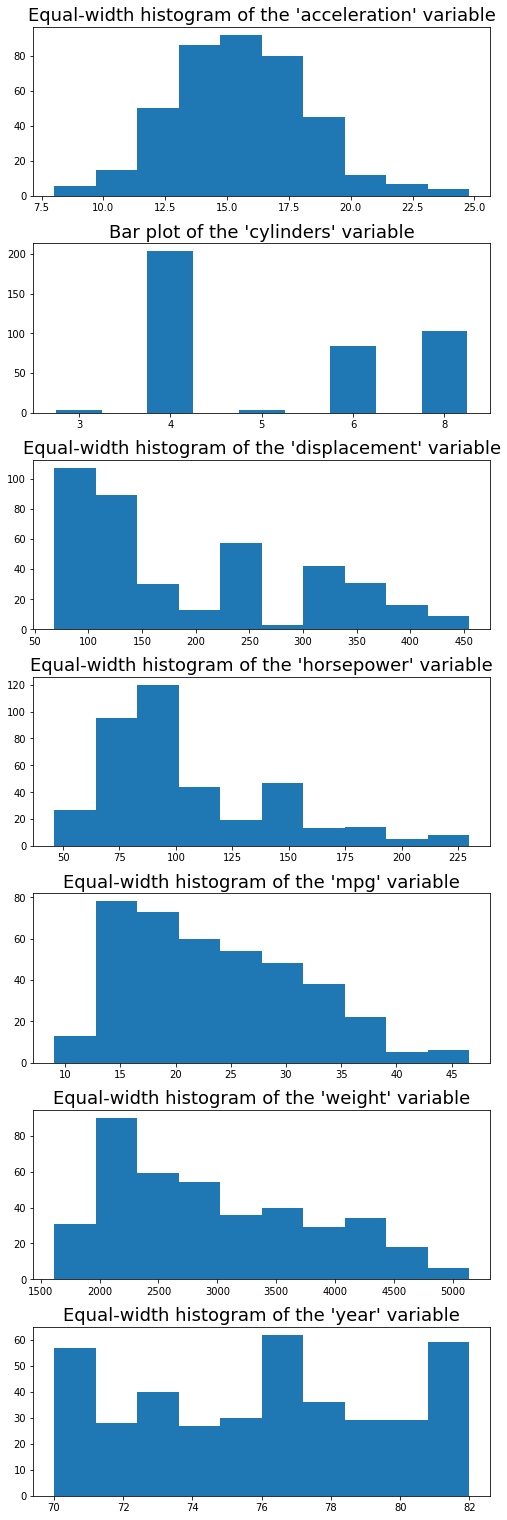

In [9]:
plotQuantitativeVariables(df.xs('quantitative', axis=1), height=3, width=7)

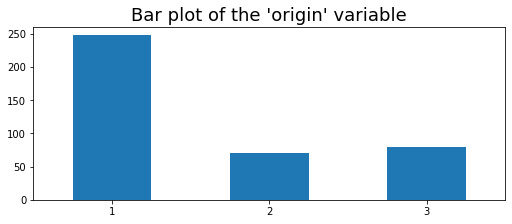

In [10]:
plotCategoricalVariables(df.xs('categorical', axis=1), height=3, width=7)

<p>We also compute the correlation matrix of the variables.</p>

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)